In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [170]:
covid = pd.read_csv('Covid19.csv', parse_dates= ['Date_reported'])

In [171]:
covid.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-04,NE,Niger,AFR,NaN,0,NaN,0
1,2020-01-04,NO,Norway,EUR,NaN,0,NaN,0
2,2020-01-04,PW,Palau,WPR,0.0,0,0.0,0
3,2020-01-04,PY,Paraguay,AMR,NaN,0,NaN,0
4,2020-01-04,PN,Pitcairn,WPR,0.0,0,0.0,0


In [172]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487680 entries, 0 to 487679
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date_reported      487680 non-null  datetime64[ns]
 1   Country_code       485648 non-null  object        
 2   Country            487680 non-null  object        
 3   WHO_region         487680 non-null  object        
 4   New_cases          210274 non-null  float64       
 5   Cumulative_cases   487680 non-null  int64         
 6   New_deaths         153909 non-null  float64       
 7   Cumulative_deaths  487680 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 29.8+ MB


In [173]:
covid['New_cases'].isna().sum()

277406

<h3>56% Of data is missing</h3>

In [174]:
covid = covid.sort_values(["Country", "WHO_region", "Date_reported"]).reset_index(drop = True)

In [175]:
grouped_data = covid.groupby(['Country'	,'WHO_region'])

<h3>Sorting and grouping data for preparing for shifting operations</h3>

In [176]:
covid["Cumulative_cases_prev"] = grouped_data["Cumulative_cases"].shift(1, fill_value= 0)
covid["Cumulative_deaths_prev"] = grouped_data["Cumulative_deaths"].shift(1, fill_value= 0)

<h3>Shifting the data of the cumulative columns  to create a new column indicating the previous cumulative data</h3>

In [177]:
covid.isna().sum()

Date_reported                  0
Country_code                2032
Country                        0
WHO_region                     0
New_cases                 277406
Cumulative_cases               0
New_deaths                333771
Cumulative_deaths              0
Cumulative_cases_prev          0
Cumulative_deaths_prev         0
dtype: int64

In [178]:
covid['New_cases'] = covid.apply(
    lambda row: (row['Cumulative_cases'] - row['Cumulative_cases_prev']) if pd.isna(row['New_cases']) else row['New_cases'], axis= 1
)

<h3>Subtracting the previous cumulative cases to the current cumulative cases to fill the missing new cases values</h3>

In [179]:
covid['New_deaths'] = covid.apply(
    lambda row: (row['Cumulative_deaths'] - row['Cumulative_deaths_prev']) if pd.isna(row['New_deaths']) else row['New_deaths'], axis= 1
)

<h3>Subtracting the previous cumulative cases to the current cumulative cases to fill the missing new cases values</h3>

In [180]:
covid.dropna(inplace= True)

<h3>Dropping the missing Columns from country code columns since it's less than 5% o the data</h3>

In [181]:
covid.isna().sum()

Date_reported             0
Country_code              0
Country                   0
WHO_region                0
New_cases                 0
Cumulative_cases          0
New_deaths                0
Cumulative_deaths         0
Cumulative_cases_prev     0
Cumulative_deaths_prev    0
dtype: int64

<h3>All the missing values are imputed or deleted</h3>

<h3>Handling outliers and Removing negative values</h3>

In [182]:
covid = covid[(covid['New_deaths'] >= 0)]
covid = covid[(covid['New_cases'] >= 0)]

In [183]:
q1_deaths = covid['Cumulative_deaths'].quantile(0.25)
q3_deaths = covid['Cumulative_deaths'].quantile(0.75)
iqr = q3_deaths - q1_deaths
upper_limit_deaths = q3_deaths + 1.5 * iqr 
lower_limit_deaths = q1_deaths - 1.5 * iqr 
covid = covid[(covid['Cumulative_deaths'] < upper_limit_deaths) & (covid['Cumulative_deaths'] > lower_limit_deaths)]

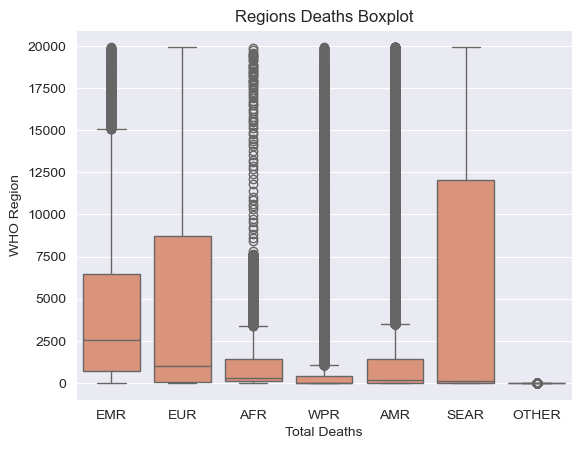

In [184]:
sns.boxplot(data= covid, y= 'Cumulative_deaths',x= 'WHO_region')
plt.xlabel("Total Deaths")
plt.ylabel("WHO Region")
plt.title("Regions Deaths Boxplot")
plt.show()

In [185]:
q1_cases = covid['Cumulative_cases'].quantile(0.25)
q3_cases = covid['Cumulative_cases'].quantile(0.75)
iqr = q3_cases - q1_cases
upper_limit_cases = q3_cases + 1.5 * iqr 
lower_limit_cases = q1_cases - 1.5 * iqr 
covid = covid[(covid['Cumulative_cases'] < upper_limit_cases) & (covid['Cumulative_cases'] > lower_limit_cases)]

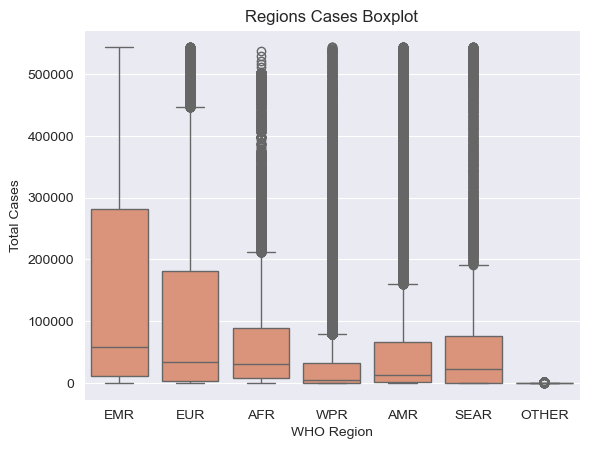

In [186]:
sns.boxplot(data= covid, y= 'Cumulative_cases',x= 'WHO_region')
plt.xlabel("WHO Region")
plt.ylabel("Total Cases")
plt.title("Regions Cases Boxplot")
plt.show()

In [187]:
covid['New_deaths'].describe()

count    352703.000000
mean          3.055979
std          31.718728
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        5841.000000
Name: New_deaths, dtype: float64

In [188]:
q1_cases = covid['New_cases'].quantile(0.95)
print(q1_cases)


780.0


In [189]:
covid['year'] = covid['Date_reported'].dt.year

In [190]:
sns.set_style('darkgrid')
sns.set_palette('flare')

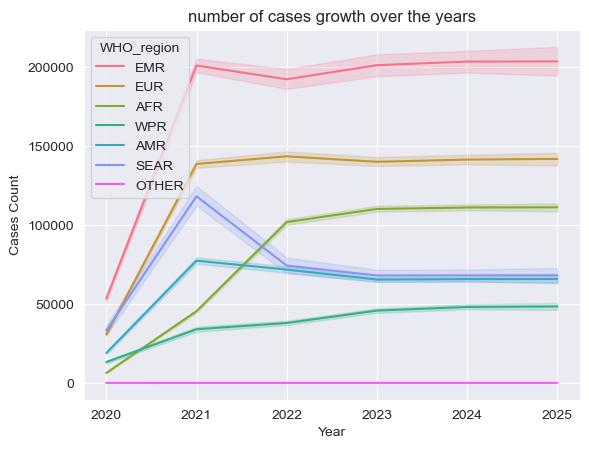

In [191]:
sns.lineplot(data= covid, y= 'Cumulative_cases',x= 'year',hue= 'WHO_region')
plt.xlabel("Year")
plt.ylabel("Cases Count")
plt.title("number of cases growth over the years")
plt.show()

<h3>EMR was the most rapid cases grow</h3>

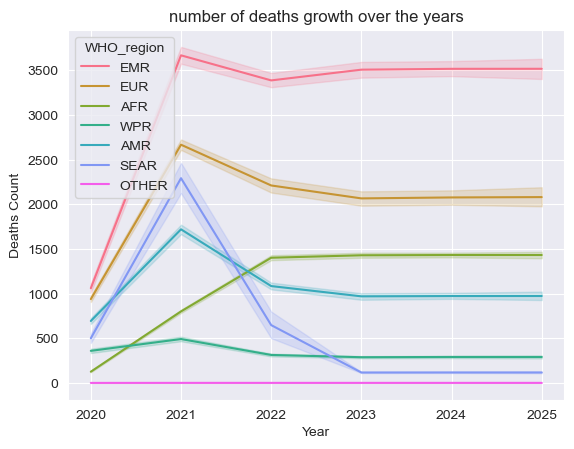

In [192]:
sns.lineplot(data= covid, y= 'Cumulative_deaths',x= 'year',hue= 'WHO_region')
plt.xlabel("Year")
plt.ylabel("Deaths Count")
plt.title("number of deaths growth over the years")
plt.show()

<h3>EMR has the most rapid deaths grow</h3>

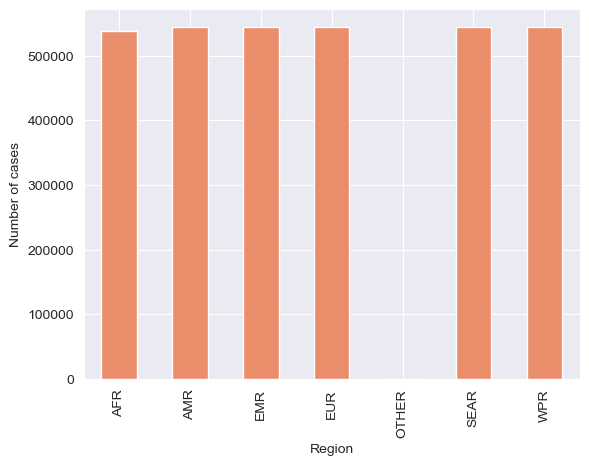

In [193]:
covid.groupby("WHO_region")['Cumulative_cases'].max().plot(kind='bar')
plt.xlabel("Region")
plt.ylabel("Number of cases")
plt.show()

<h3>EUR is the region with the most number of cases</h3>

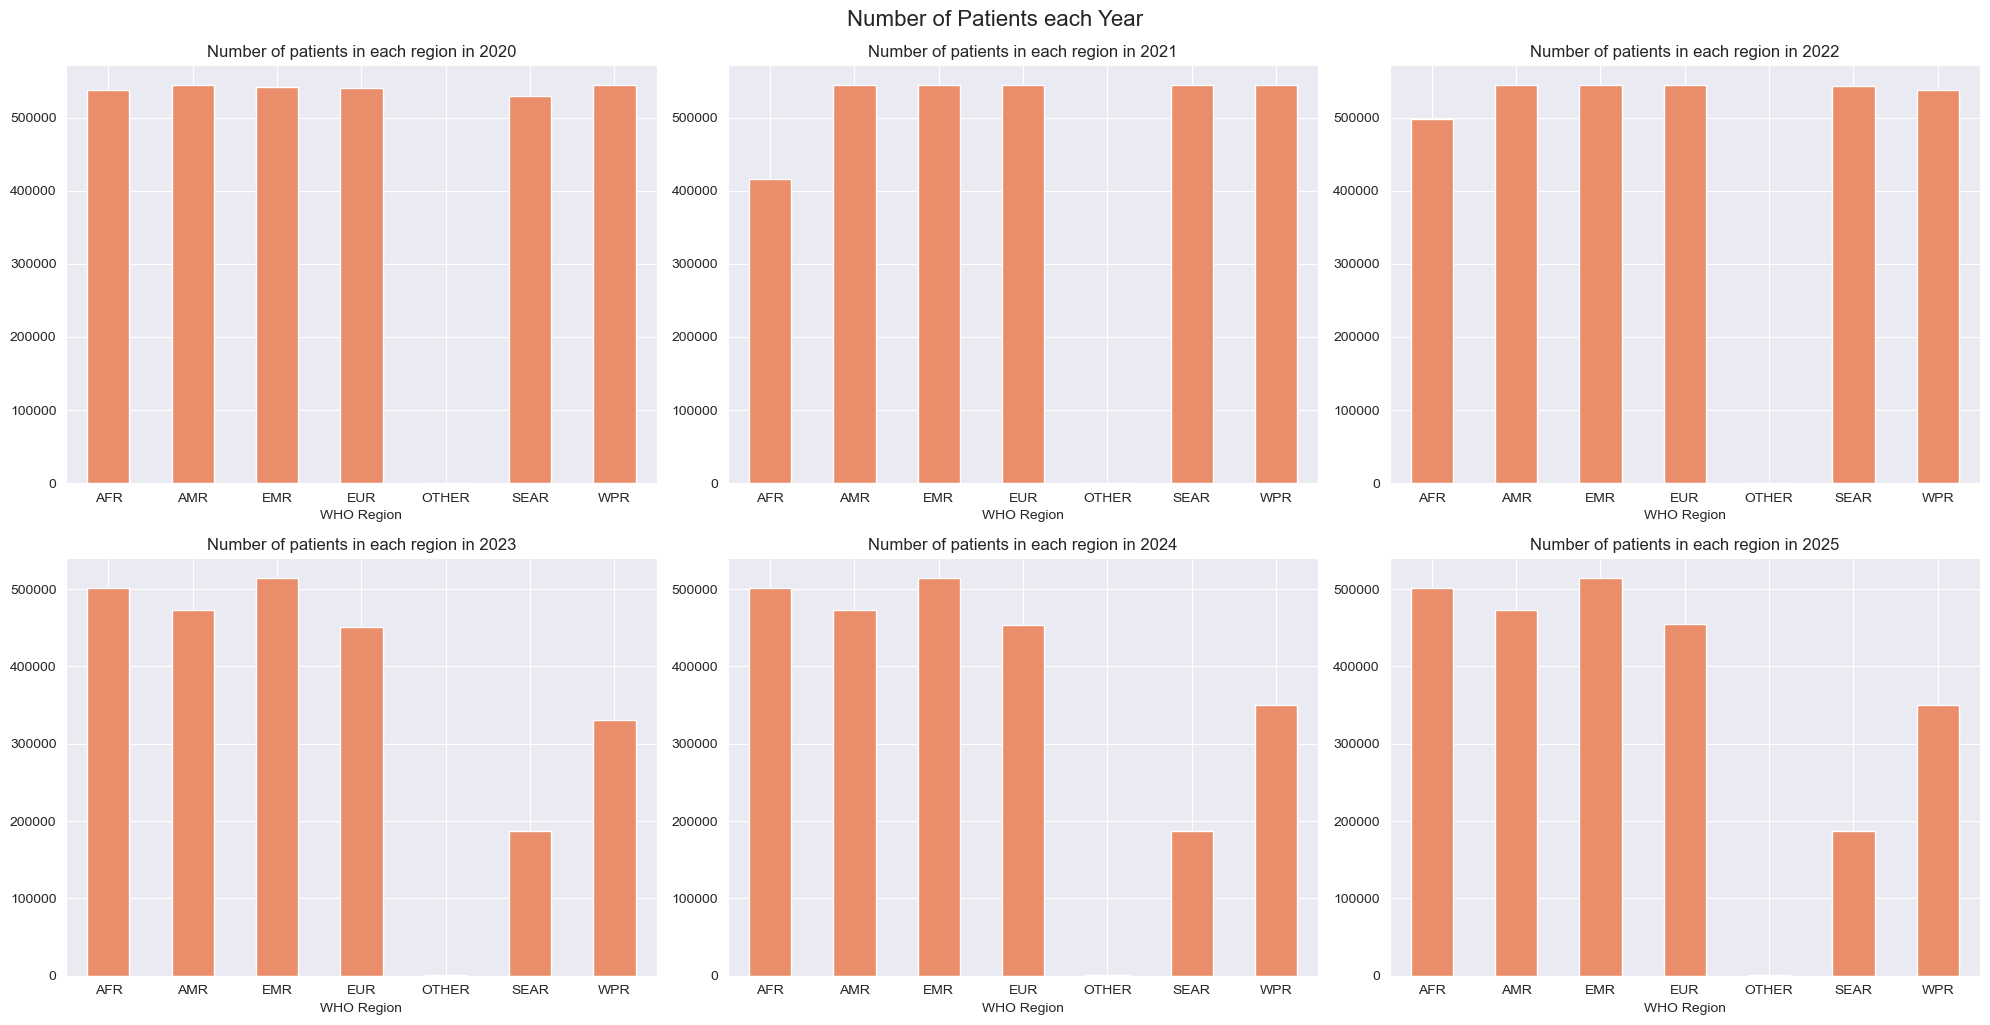

In [194]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()
for y, c in enumerate(covid['year'].unique()):
    covid[covid['year'] == c].groupby('WHO_region')['Cumulative_cases'].max().plot(kind='bar', ax=axs[y])
    axs[y].set_xticklabels(axs[y].get_xticklabels(), rotation=0)
    axs[y].set_xlabel('WHO Region')
    axs[y].set_title(f'Number of patients in each region in {c}')

plt.tight_layout()
plt.suptitle('Number of Patients each Year', x=0.5, y=1.02, fontsize=16)
plt.show()

<h3>2022 Was the year with the most number of cases and WPR is the region with the most number of patients</h3>

<h2>Studying 2022</h2>

In [195]:
year2022 = covid[covid['year'] == 2022]

In [196]:
year2022['month'] = covid['Date_reported'].dt.month

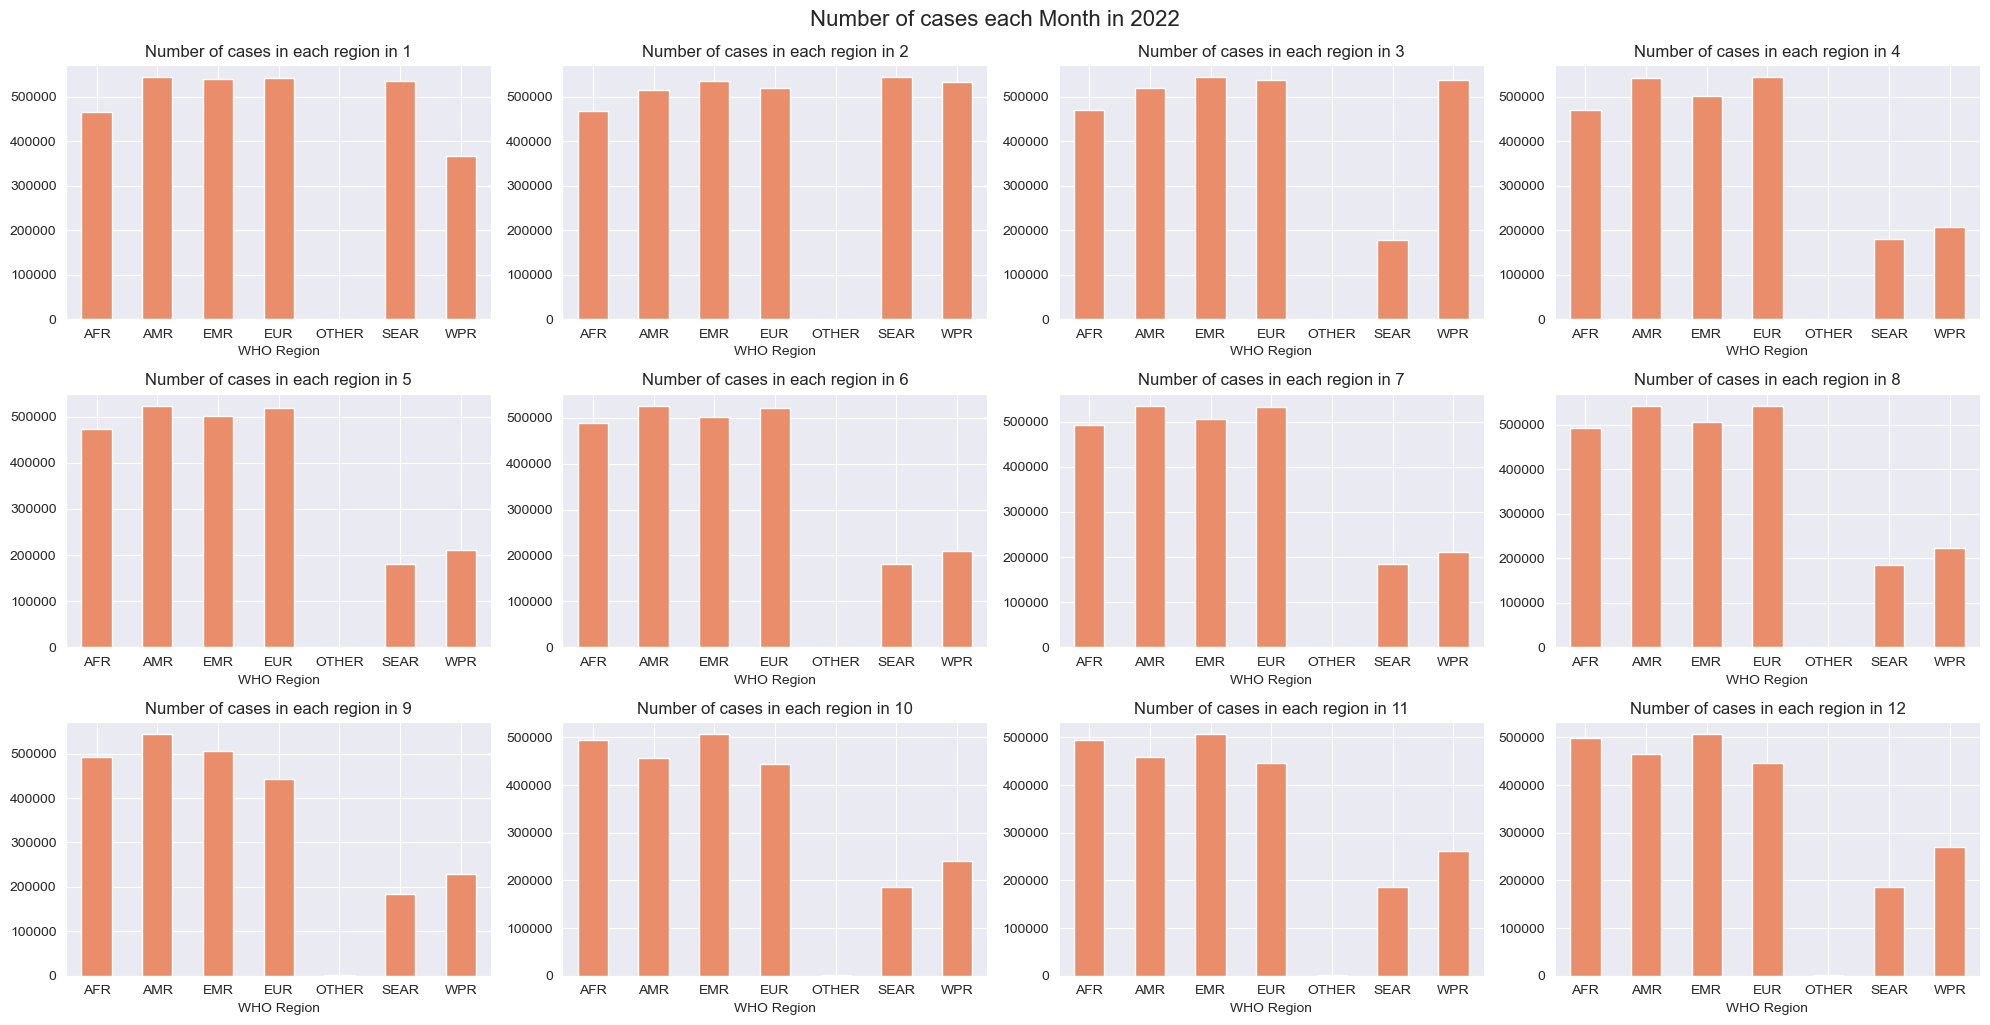

In [197]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 10))
axs = axs.flatten()
for y, c in enumerate(year2022['month'].unique()):
    year2022[year2022['month'] == c].groupby('WHO_region')['Cumulative_cases'].max().plot(kind='bar', ax=axs[y])
    axs[y].set_xticklabels(axs[y].get_xticklabels(), rotation=0)
    axs[y].set_xlabel('WHO Region')
    axs[y].set_title(f'Number of cases in each region in {c}')

plt.tight_layout()
plt.suptitle('Number of cases each Month in 2022', x=0.5, y=1.02, fontsize=16)
plt.show()

<h3>January was the month with the most number of cases in 2022 and AFR is the region with the most number of cases</h3>

In [198]:
print(year2022['Cumulative_cases'].corr(year2022['Cumulative_deaths']))

0.7484539295468362


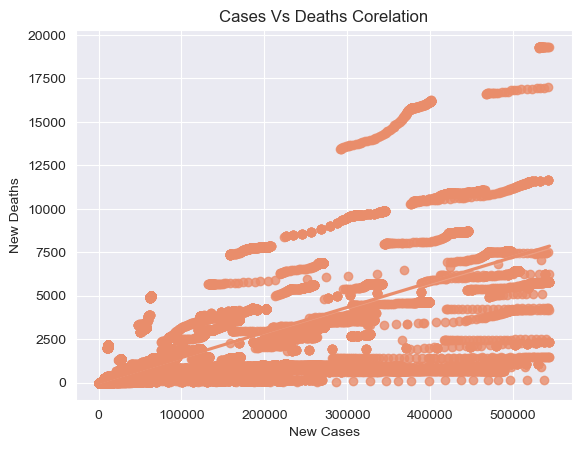

In [199]:
sns.regplot(data= year2022, x= 'Cumulative_cases', y= 'Cumulative_deaths')
plt.xlabel('New Cases')
plt.ylabel('New Deaths')
plt.title("Cases Vs Deaths Corelation")
plt.show()

<h3>Correlation Between Deaths and Cases is 74% in 2022</h3>



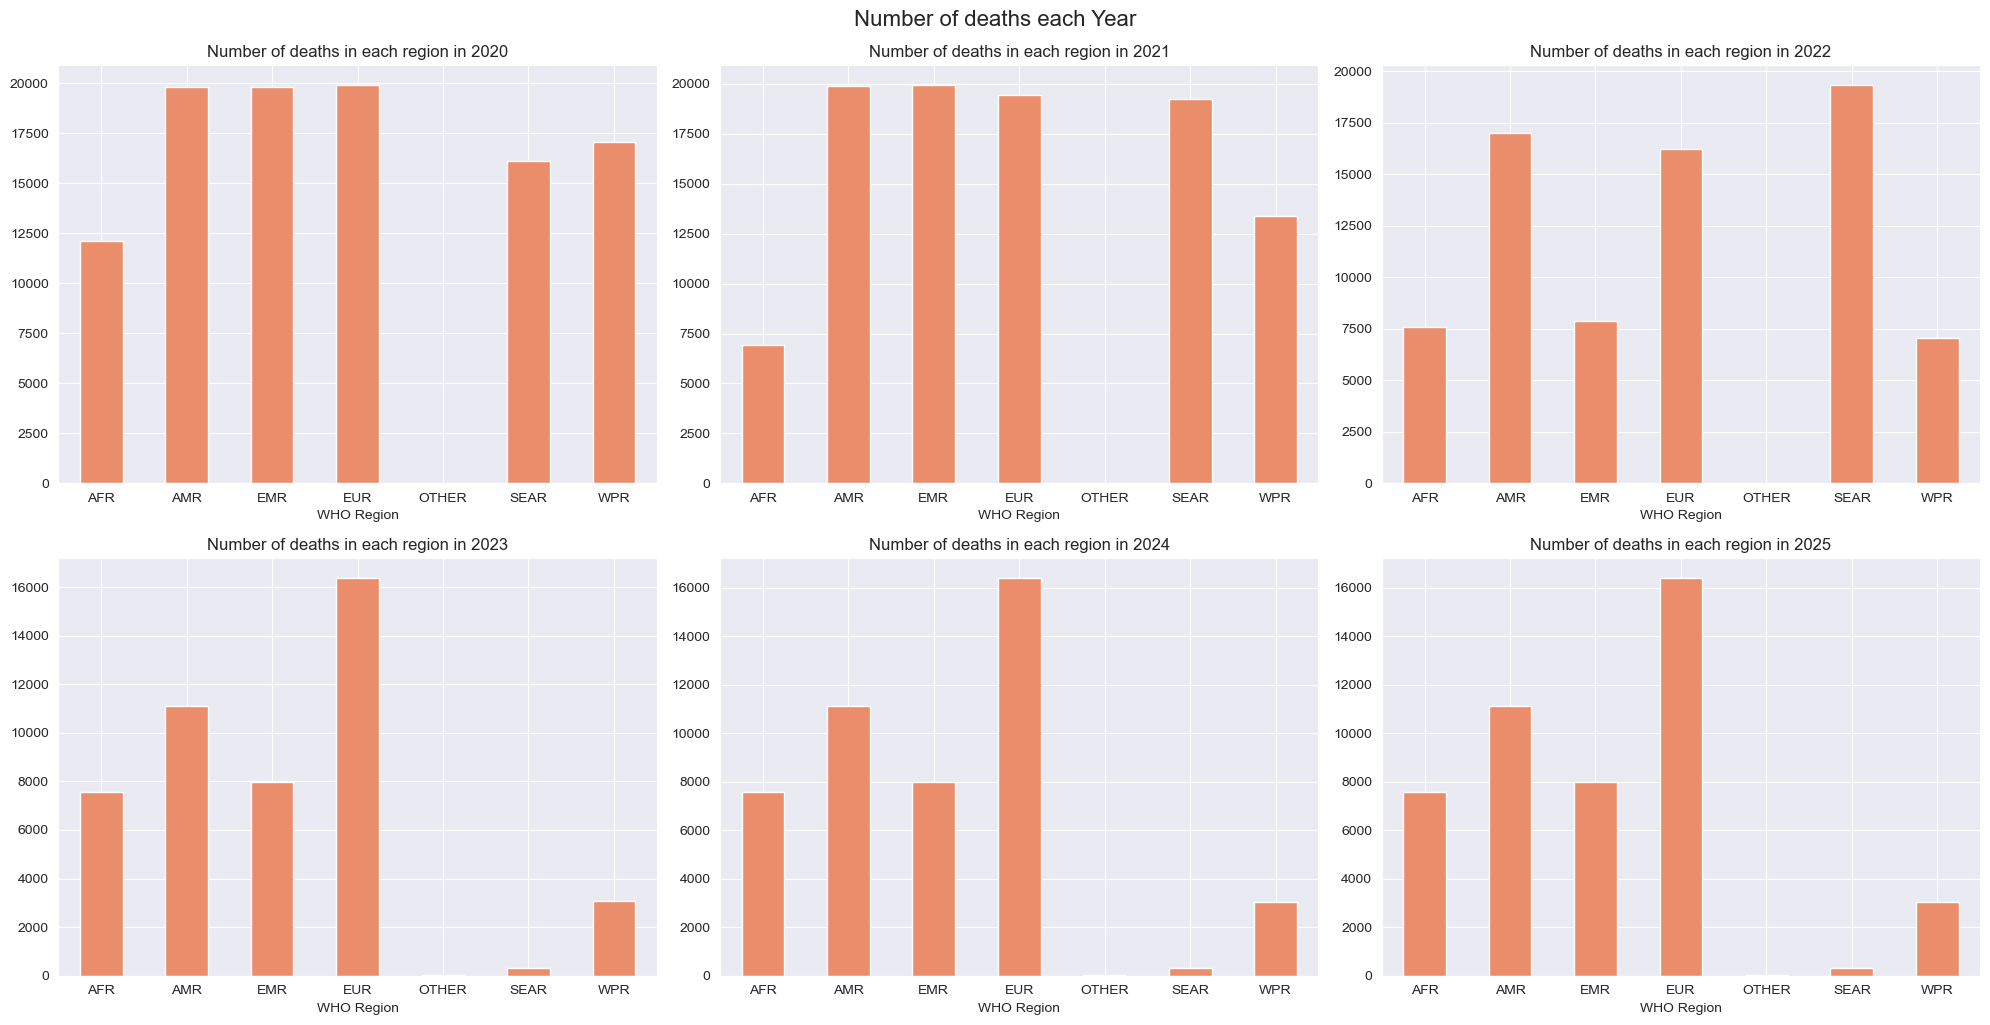

In [200]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()
for y, c in enumerate(covid['year'].unique()):
    covid[covid['year'] == c].groupby('WHO_region')['Cumulative_deaths'].max().plot(kind='bar', ax=axs[y])
    axs[y].set_xticklabels(axs[y].get_xticklabels(), rotation=0)
    axs[y].set_xlabel('WHO Region')
    axs[y].set_title(f'Number of deaths in each region in {c}')

plt.tight_layout()
plt.suptitle('Number of deaths each Year', x=0.5, y=1.02, fontsize=16)
plt.show()

<h3>2021 was the year with the most number of deaths and AMR is the region with the most number of deaths</h3>

<h2>Studying 2021</h2>

In [201]:
year2021 = covid[covid['year'] == 2021]

In [202]:
year2021['month'] = year2021['Date_reported'].dt.month

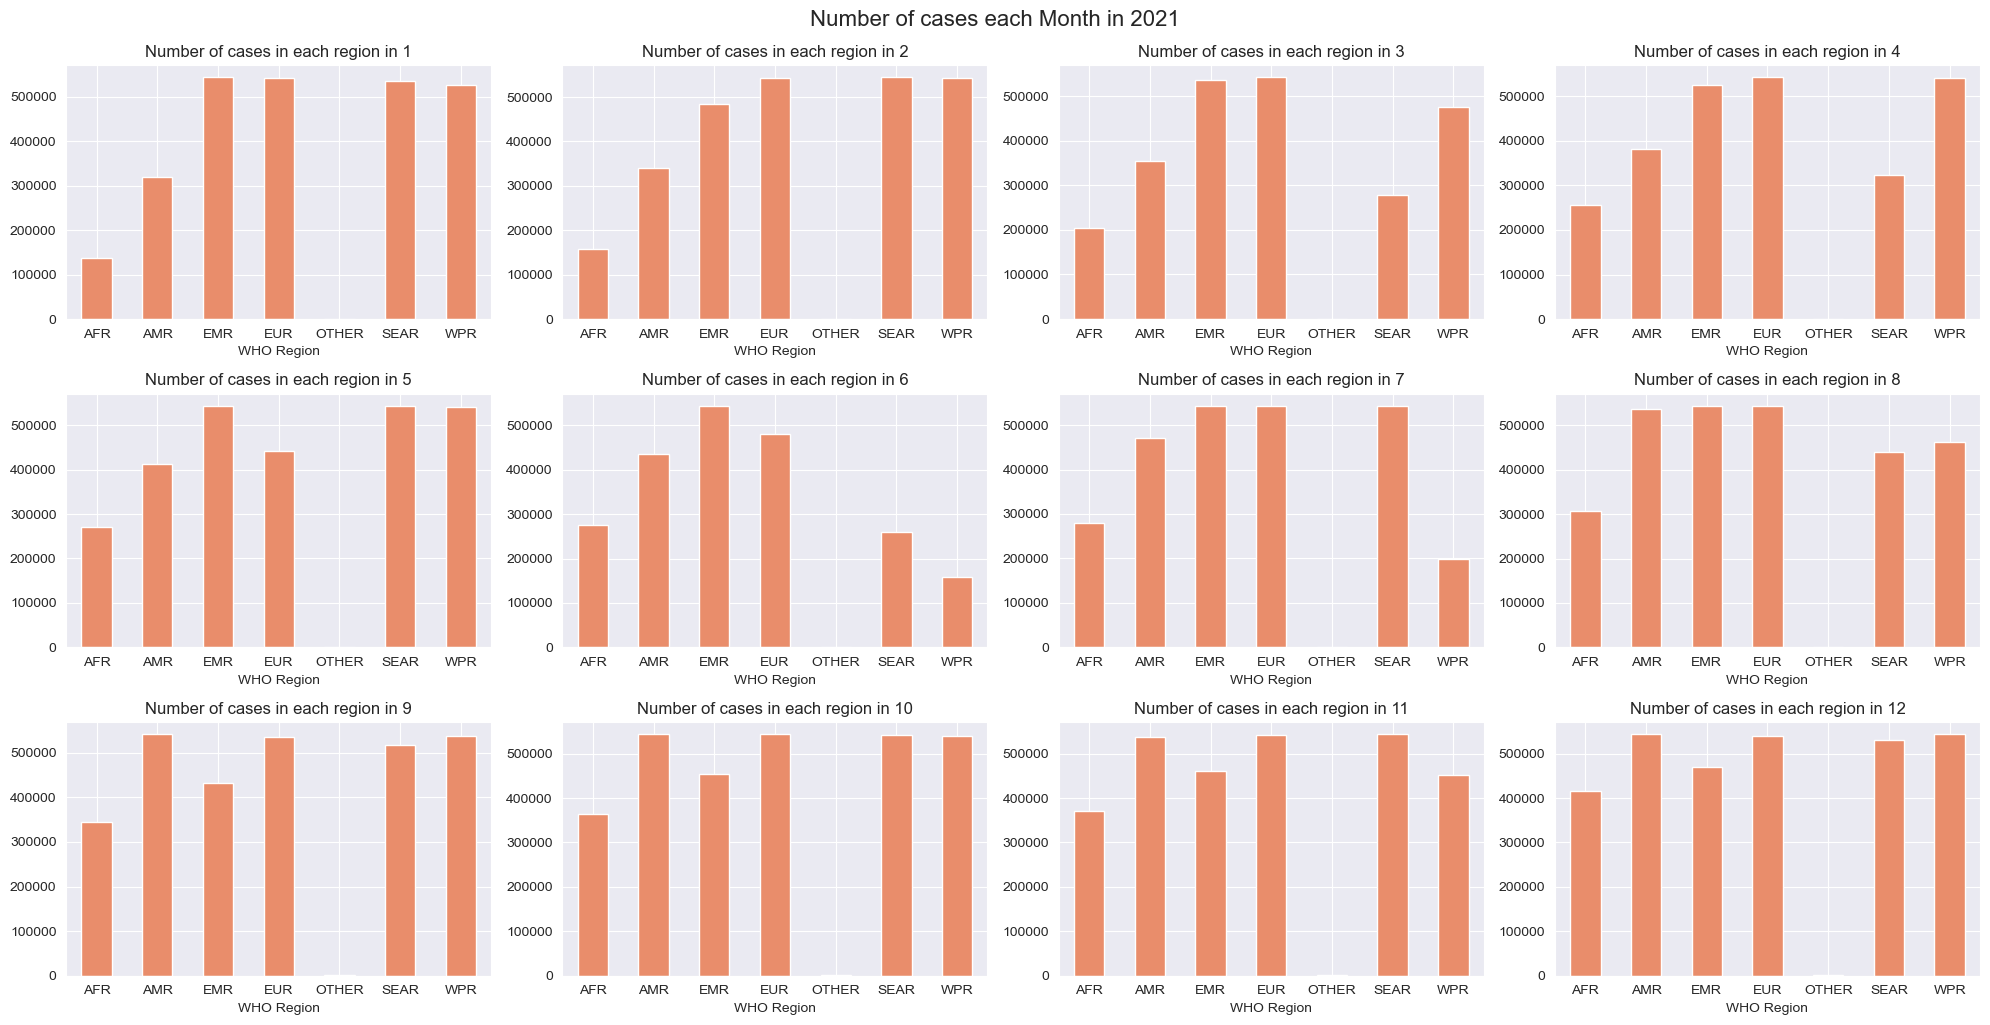

In [203]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 10))
axs = axs.flatten()
for y, c in enumerate(year2021['month'].unique()):
    year2021[year2021['month'] == c].groupby('WHO_region')['Cumulative_cases'].max().plot(kind='bar', ax=axs[y])
    axs[y].set_xticklabels(axs[y].get_xticklabels(), rotation=0)
    axs[y].set_xlabel('WHO Region')
    axs[y].set_title(f'Number of cases in each region in {c}')

plt.tight_layout()
plt.suptitle('Number of cases each Month in 2021', x=0.5, y=1.02, fontsize=16)
plt.show()

<h3>January was the month with the most number of deaths and AMR is the region with the most number of deaths</h3>

In [204]:
year2021['Cumulative_cases'].corr(year2021['Cumulative_deaths'])

0.8121565602590267

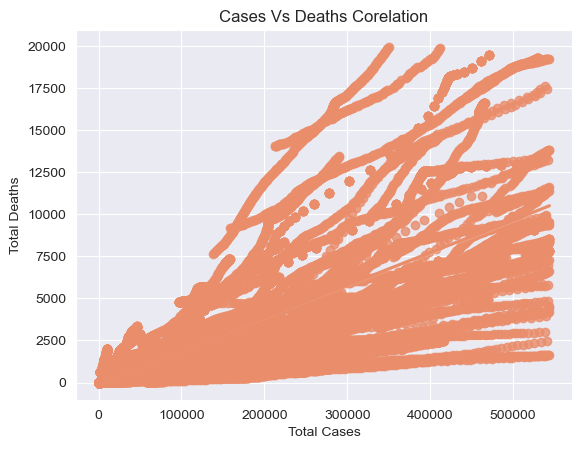

In [205]:
sns.regplot(data= year2021, x= 'Cumulative_cases', y= 'Cumulative_deaths')
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.title("Cases Vs Deaths Corelation")
plt.show()

<h3>Correlation Between Deaths and Cases in 2021 is 81%</h3>

In [206]:
covid['Cumulative_cases'].describe()

count    352703.000000
mean      74904.109716
std      120262.271964
min           0.000000
25%        1746.500000
50%       17130.000000
75%       83440.000000
max      544116.000000
Name: Cumulative_cases, dtype: float64

In [207]:
covid['New_deaths'].describe()

count    352703.000000
mean          3.055979
std          31.718728
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        5841.000000
Name: New_deaths, dtype: float64